In [2]:
import sys
from pathlib import Path, PurePath as PPath

print('Python ver: {}\nPython env: {}'.format(sys.version, Path(sys.prefix).name))
print('Currrent dir: {}\n'.format(Path.cwd()))

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    if up:
        # NB: Path does not have a str method.
        newp = str(PPath(this_path).parent)
    else:
        newp = str(PPath(this_path)) 
    
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))

# if notebook inside another folder, eg ./notebooks:
nb_folder = 'notebooks'
add_to_sys_path(Path.cwd(), Path.cwd().name.startswith(nb_folder))


def get_project_dirs(which=['data', 'images'], nb_folder='notebooks'):
    dir_lst = []
    if Path.cwd().name.startswith(nb_folder):
        dir_fn = Path.cwd().parent.joinpath
    else:
        dir_fn = Path.cwd().joinpath
        
    for d in which:
        DIR = dir_fn(d)
        if not DIR.exists():
            Path.mkdir(DIR)
        dir_lst.append(DIR)
    return dir_lst

DIR_DATA, DIR_IMG = get_project_dirs()
    
import numpy as np
import scipy as sp
from scipy import stats as sps
import pandas as pd
#pd.set_option("display.max_colwidth", 200)

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-muted')

from pprint import pprint as pp

# Filtered dir() for method discovery:
def filter_dir(obj, start_with_str='_', exclude=True):
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]

def get_mdl_pkgs(alib):
    import inspect
    "Inspect module hierarchy on two levels ony."
    for name, mdl in inspect.getmembers(alib, inspect.ismodule):
        print('\n{:>13} : {}'.format(mdl.__name__, filter_dir(mdl)))
        for mdl_name, mdl_sub in inspect.getmembers(mdl, inspect.ismodule):
            if mdl_sub.__doc__:
                print('\n{:>20} : {}'.format(mdl_name, mdl_sub.__doc__.strip()))
                

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import HTML, Markdown #, IFrame
# for presentations:
#display(HTML("<style>.container { width:100% !important; }</style>"))

Markdown( """First code cell from custom template `dsml.ipynb`. 
_See Tim Paine's [jupyter_lab templates extention](https://github.com/timkpaine/jupyterlab_templates)._
""")

def new_section(title='New section'):
    style = "text-align:center;background:#c2d3ef;padding:16px;color:#ffffff;font-size:2em;width:98%"
    return HTML('<div style="{}">{}</div>'.format(style, title))


def add_div(div_class, div_start, div_text, output_string=True):
    from IPython import get_ipython
    from IPython.display import HTML, Markdown
    """
    Behaviour with default `output_string=True`:
    The cell is overwritten with the output string, but the cell mode is still in 'code' not 'markdown':
    ```
    [x]
    add_div('alert-warning', 'Tip: ', 'some tip here', output_string=True)
    [x]
    <div class="alert alert-warning"><b>Tip: </b>some tip here</div>
    ```
    The only thing to do is change the cell mode to Markdown.
    If `output_string=False`, the HTML output is displayed in an output cell.
    """
    accepted = ['alert-info', 'alert-warning', 'alert-danger']
    if div_class not in accepted:
        return HTML(f"""<div class="alert"><b>Wrong class:</b> `div_start` is one of {accepted}.
                    </div>""")
    div = f"""<div class="alert {div_class}"><b>{div_start}</b>{div_text}</div>"""
    if output_string:
        return get_ipython().set_next_input(div, 'markdown')
    else:
        return Markdown(div) #HTML(div)

# autoreload extension
from IPython import get_ipython
ipython = get_ipython()

if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

Python ver: 3.6.7 (default, Feb 28 2019, 07:28:18) [MSC v.1900 64 bit (AMD64)]
Python env: dsml
Currrent dir: C:\Users\catch\Documents\GitHub\Statistics-in-Python



First code cell from custom template `dsml.ipynb`. 
_See Tim Paine's [jupyter_lab templates extention](https://github.com/timkpaine/jupyterlab_templates)._


In [3]:
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

---
---
# Computational Statistics with Scipy

See Scipy 2015 tutorial
https://github.com/AllenDowney/CompStats
---

# Statistical inference

## Quantifiers in order of importance:

 1. Effect size: usually a single number, ideally comparable acros stidues

 2. Confidence interval/SE: quantifies the precision of the estimate

 3. p-value: indicates whether the apparent effect might be due to chance

# Part I

#### Helper function to obtain the domain and range of a (scipy.stats [continuous | discrete] distribution) random variable (rv) using its pdf.

In [4]:
def eval_pdf(rv, num=4, points=100):
    """
    Evaluate the normal (Gaussian) probability density function (PDF) within '`num` standard deviations of the mean.
    Input: 
        rv: numpy rv object
        num: the number of standard deviations away from the mean to plot
        points: number of points to plot
    Output: a pair of NumPy arrays, i.e: domain, rv.pdf(domain)
    """
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, points)
    ys = rv.pdf(xs)
    return xs, ys

## Use `scipy.stats.norm` to produce normal distributions given a mean and standard deviation.

**Note**: other names for mean and standard deviation:  

| Mean | Standard deviation |  
|----|----|  
| mean | std |
| $\mu$ | $\sigma$ |   
| `loc` | `scale` |  


## Given (sample) stats:

In [5]:
mu1, sig1 = 178, 7.7
male_height = sps.norm(mu1, sig1)

mu2, sig2 = 163, 7.3
female_height = sps.norm(mu2, sig2)

## 'Recover' the true population using the pdf

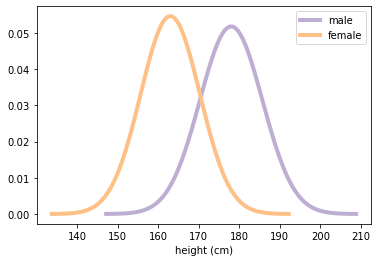

In [6]:
xs1, ys1 = eval_pdf(male_height)
plt.plot(xs1, ys1, label='male', linewidth=4, color=COLOR2)

xs2, ys2 = eval_pdf(female_height)
plt.plot(xs2, ys2, label='female', linewidth=4, color=COLOR3)

plt.xlabel('height (cm)')
plt.legend()
plt.show();

# Sample the population using the `.rvs()` method:

In [7]:
N = 1000

male_sample = male_height.rvs(N)

female_sample = female_height.rvs(N)

## Stats from sampling the population:  
The sample mean is close to the population mean, but not exact, as expected.

In [8]:
mean1, std1 = male_sample.mean(), male_sample.std()
mu1, mean1, std1

mean2, std2 = female_sample.mean(), female_sample.std()
mu2, mean2, std2

(178, 177.98701656715224, 7.723952507001857)

(163, 163.3122057227971, 7.364243464560319)

# Percentage differences
 
## Compared to what? 

#### The answer to that question is the name of the series which is subtracted from another to obtain a difference AND which is used to normalize this difference, hence this series has to be the same. Even Allen Downey got this wrong...
#### Another notable fact: a percentage differece is a _signed_ quantity!  

In general a pct difference formula explicitely tells you which quantity is the reference from the difference formula (but only if you can see the formula). 

In the `pct_means_diff1` formula below, the reference is the mean of female_sample because that is the quantity subtracted from the other (male_sample) mean AND it is used to normalize the diff viz the female_sample data.  Therefore, it is a consistent formula:
```
# compared to the female variable:
pct_means_diff1 = (male_sample.mean() - female_sample.mean()) / female_sample.mean()

# compared to the male variable:
pct_means_diff2 = (female_sample.mean() - male_sample.mean()) / male_sample.mean()
```
Here are a few other examples:
```
# %change in stock market values (compared to previous day):
(closing_prices_today - closing_prices_yesterday) / closing_prices_yesterday

# guess what this one is:
(Jetter - DiMaggio) / DiMaggio
```
## The *correct*  pct difference formula, will yield the *correct* narrative, e.g.:

```
On average, the male height (cm) is 9.47% higher than that of the female.

# see code cell below

```

In [12]:
def mean_pct_change_story(series, series_names, measure, units):
    """
    Calculate the % difference between the means of series[0] and series[1]
    using the latter as reference and printout a meaningful narrative.
    Input:
      series (list[np arrays]): series[1] is the reference
      series_names (list): [series1_name, series2_name]
      measure (string): what is measured, e.g. height
      units (string): series measurement units (common to both)
    Output:
      (string): Formatted narrative
    TODO:
      Complete input validation
    """
    if len(series) != 2:
        return 'Expecting a list of 2 np arrays.'
    if len(series_names) != 2:
        return 'Provide a name for each series in this order: [series1_name, series2_name].'
    
    mu1, mu2 = series[0].mean(), series[1].mean()
    pct_diff = (mu1 - mu2) / mu2
    comparator = 'higher' if pct_diff > 0 else 'lower'

    s = 'On average, the {} {} ({}) is {:.2%} {} than that of the {}. (Value: {:.2f}.)'
    print(s.format(series_names[0], measure, units, abs(pct_diff), comparator, series_names[1], pct_diff))


In [13]:
units = 'cm'
what = 'height'

which1 = ['female', 'male']
case1_series = [female_sample, male_sample]

mean_pct_change_story(case1_series, which1, what, units)

which2 = ['male', 'female']
case2_series = [male_sample, female_sample]

mean_pct_change_story(case2_series, which2, what, units)

On average, the female height (cm) is 8.24% lower than that of the male. (Value: -0.08.)
On average, the male height (cm) is 8.99% higher than that of the female. (Value: 0.09.)


## Part II

An alternative way to express the difference between distributions is to see how much they **overlap**.

### The "overlap" is the area under the curves that ends up on the wrong side of a threshold.  

There are different way to compute a threshold:

* Simple threshold:

In [9]:
# Simple:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.59325465118894

* pdf crossing point threshold:

In [10]:
# pdf_cross:
pdf_thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
pdf_thresh

170.30008218110117

In [11]:
# How many in each group are below/above the threshold:
print('Simple threshold:')
male_below_simple_thresh = sum(male_sample < simple_thresh)
male_below_simple_thresh

female_above_simple_thresh = sum(female_sample > simple_thresh)
female_above_simple_thresh

print('Pdf cross threshold:')
male_below_pdf_thresh = sum(male_sample < pdf_thresh)
male_below_pdf_thresh

female_above_pdf_thresh = sum(female_sample > pdf_thresh)
female_above_pdf_thresh

Simple threshold:


182

159

Pdf cross threshold:


174

165

## Overlap:

In [12]:
male_overlap = male_below_pdf_thresh / N
male_overlap

female_overlap = female_above_pdf_thresh /N
female_overlap

0.174

0.165

## Misclassification rate:  
The fraction of people who would be misclassified if you tried to use height to guess sex, is the average of the male and female overlap rates:

In [13]:
misclassification_rate = (male_overlap + female_overlap) / 2
misclassification_rate

0.16949999999999998

## Probability of superiority (for a statistics):

In [14]:
prob_male_taller = (male_sample > female_sample).mean()

print(f'In {prob_male_taller:.2%} of randomly chosen pairs (1 man, 1 woman), the man will be taller.')

In 92.20% of randomly chosen pairs (1 man, 1 woman), the man will be taller.


### Overlap, misclassification rate and "probability of superiority" have two good properties:

* As probabilities, they don't depend on units of measure, so they are comparable between studies.

* They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

### There is one other common way to express the difference between distributions: Cohen's effect size.

* Cohen's $d$ is the difference in means, standardized by dividing by the standard deviation. Mathematically:  


$ d = \frac{\bar{x}_1 - \bar{x}_2} s $ where $s$ is the pooled standard deviation:  $s = \sqrt{\frac{n_1 s^2_1 + n_2 s^2_2}{n_1+n_2}}$

### Implementation of Cohen's d value:

I dug a bit deeper into the effect size calculations and visited these resources:  
* https://www.statisticshowto.datasciencecentral.com/pooled-standard-deviation/
> You can only use the above formulas if the standard deviations for the two groups are the same 
(this is because it would otherwise be violating the assumption of homogeneity of variances. 
 If the standard deviations are different, run Hedge’s g or Glass’s Delta instead.
* https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python
* https://en.wikipedia.org/wiki/Effect_size#Cohen's_d 
* https://en.wikipedia.org/wiki/Pooled_variance:
 > Definition: The pooled variance is an estimate of the fixed common variance {\displaystyle \sigma ^{2}}\sigma ^{2} underlying various populations that have different means.
* https://github.com/statsmodels/statsmodels/issues/5896 

Thanks to the last one (Statsmodels repo), I found out that a statistical analysis package already has an effect size function implemented for multiple cases.  
This package is mysteriously call [Pengouin](https://pingouin-stats.org/index.html), but does wonder in whetting one's appetite:  
>Pingouin is designed for users who want simple yet exhaustive stats functions.
For example, the ttest_ind function of SciPy returns only the T-value and the p-value. By contrast, the ttest function of Pingouin returns the T-value,  
the p-value, the degrees of freedom, the effect size (Cohen’s d), the 95% confidence intervals of the difference in means, the statistical power and the Bayes Factor (BF10) of the test.
```
> conda install -c conda-forge pingouin
```

In [15]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: pd Series or NumPy array
    group2: pd Series or NumPy array

    returns: float
    """
    n1, n2 = len(group1), len(group2)
    
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d


def overlap_superiority(control, treatment, n=1000, use_pdf_threshold=True):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    use_pdf_threshold: bool, 
       if True: pdf_cross threshold is used else, simple threshold.
       Implemented to plot the effect of the thresholding method.
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    
    mu1, mu2 = control.mean(), treatment.mean()
    
    if use_pdf_threshold:
        std1, std2 = control.std(), treatment.std()
        # pdf_cross threshold:
        thresh = (std1 * mu2 + std2 * mu1) / (std1 + std2)
    else:
        # simple threshold:
        thresh = (mu1 + mu2) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority


def plot_pdfs(cohen_d=2, pdf_threshold=True):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    pdf_threshold: bool, use pdf_cross threshold (to pass to overlap_superiority().)
    """
    control = sps.norm(0, 1)
    treatment = sps.norm(cohen_d, 1)
    
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color=COLOR3, alpha=0.7)

    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color=COLOR2, alpha=0.7)
    
    o, s = overlap_superiority(control, treatment, use_pdf_threshold=pdf_threshold)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    
    plt.text(-4, 0.35, f"Cohen's d: {cohen_d:.2f}")
    if pdf_threshold:
        tresh = 'Pdf cross'
    else:
        tresh = 'Simple'
    plt.text(-4, 0.39, f"Threshold: {tresh}")
    
    plt.legend()
    plt.show();

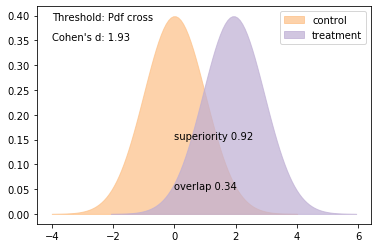

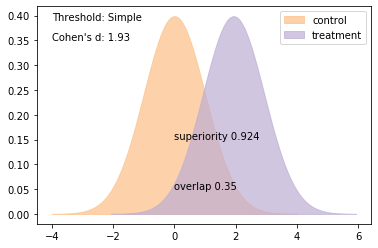

In [16]:
cohen_d = CohenEffectSize(male_sample, female_sample)

plot_pdfs(cohen_d, pdf_threshold=True)
plot_pdfs(cohen_d, pdf_threshold=False)

## In summary, the best way to report effect size depends on the audience and your goals.   
### There is often a tradeoff between summary statistics that have good technical properties and statistics that are meaningful to a general audience.